# **Modeling Images and Videos as Multidimensional Signals Using State Spaces**

S4ND : https://arxiv.org/pdf/2210.06583.pdf  

S4ND code : https://github.com/state-spaces/s4/blob/main/src/models/sequence/modules/s4nd.py  

S4 : https://arxiv.org/pdf/2303.14526.pdf

## **Introduction**



현대 vision models 중 sota 성능을 내는 모델은 주로 visual data를 continuous-signals보단 discrete pixels로 다뤘다.  

그러나 images, videos는 다차원적이고 실제로 continuous signals을 이산화 한 것, 공간적, 시간적으로 sampling된 것으로 볼 수 있음  

저자들은 data와 signal의 차이를 인식하여 직접 continuous signal을 모델링하는 방법을 모색  

S4를 multidimensional signals로 확장 가능한 방법(deep learning layer)를 소개  

key idea : turn the standard SSM(1D ODE) into a multidimensional PDE governed by an independent SSM per dimension  





## **Preliminaries**

**State space model**은 아래와 같이 linear ODE로 표현 가능

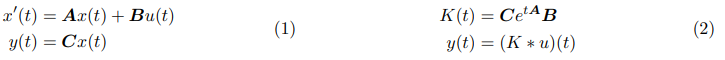

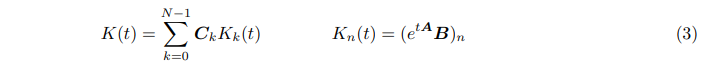

**S4**는 SSM을 이용한 모델 중 하나로 kernel을 조정하여 S4를 변형시켜 사용 가능

## **Method**

### **S4ND**

$ u = u(t^{(1)}, t^{(2)}),\space y = y(t^{(1)}, t^{(2)}) $를 각각 input, output  
$ x = (x^{(1)}(t^{(1)}, t^{(2)}),\space x^{(2)}(t^{(1)}, t^{(2)})) $을 SSM state라 하자  



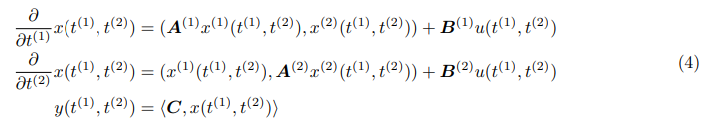

위와 같이 linear PDE를 이용하여 $ u(t_1, t_2) ⟼ y(t_1, t_2) $로 mulitiple time axis에서 scalar input,output을 mapping, 간단하게 각 축에서 독립적으로 1D SSM을 수행한다고 볼 수 있음  



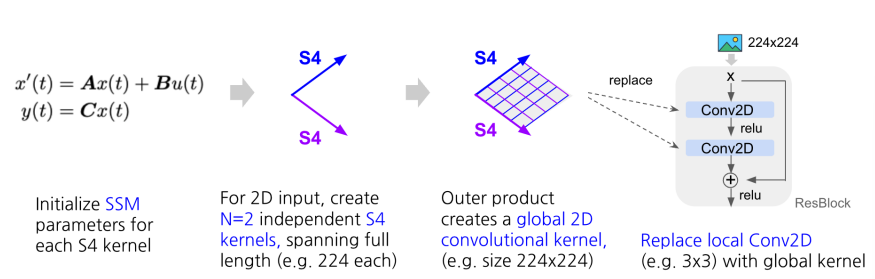

**1.** S4ND는 입력의 공간 차원 x 및 y 당 SSM을 초기화하여 이미지를 2D 입력으로 처리  

**2.** 각 차원의 전체 입력 길이에 걸쳐 있는 두 개의 독립적인 S4 커널을 인스턴스화  

**3.** 두 개의 1D 커널의 외적을 계산하면 global 컨볼루션convolution kernel이 생성되며, 이는 ResNet 또는 ConvNeXt 블록과 같은 standard local Conv2D layer를 사용할 때마다 대체할 수 있음  

**4.** 비디오용 3D 글로벌 커널을 만들기 위해 3D(S4 커널 3개 포함)에서도 유사한 절차를 수행할 수 있음

### **Resolution Change and Bandlimiting**


SSMs은 audio같은 1D에서 뛰어난 성능을 보이고 다른 주파수에서의 zero-shot test에서도 정확도를 거의 보존한다.  

이런 능력은 주파수의 상대적 변화에 의한 델타의 스케일링에 의존한다  

그러나 spatial domain의 sampling rate는 temporal donmian보다 훨씬 낮으므로 해상도를 변경할때 잠재적인 aliasing으로 이어짐  

앨리어싱을 피하기 위한 표준 기술은 Nyquist cutoff 주파수 이상의 주파수를 제거하기 위해 저역 통과 필터를 적용하는 것입니다

## **Experiments**

실험은 large-scale image classification in the 1D and 2D setting, activity classification in video in the 3D setting이고 기존 딥러닝 레이어를 S4ND레이어로 교체한 경우 성능이 일치하거나 향상됨

### **Large-scale Image Classification**

Dataset : ImageNet-1k  
1D setting baseline : ViT-B(88M params)  
2D setting baseling : ConvNeXt-T(28M params)  





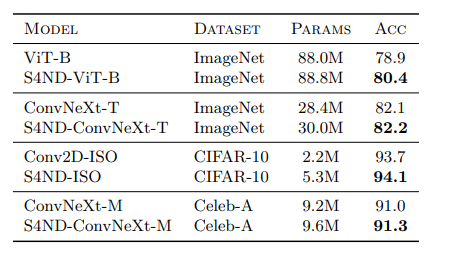

"-ISO" is an  isotropic S4ND backbone

### **Video classification**

Dataset : HMDB-51 (classifying videos in 51 activity classes)  

이전 연구에서 2D CNNs이 2D to 3D kernel inflation을 통해 3D model로 적용할 수 있음을 보였고, 이 모델을 ConvNeXt-I3D라 칭하겠음   

추가적으로 2D(spatial), 1D(temporal) kernel의 outer product로 이루어진 3D convolution kernel을 이용한 ConvNeXt-S3D를 baseline으로 사용  

학습은 RGB frame만을 이용하여 총 30 frames으로 2초짜리 clip을 사용  




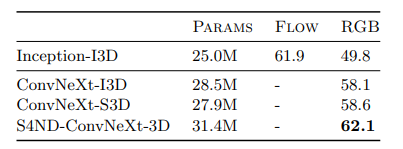

S4ND가 baseline에 비해 좋은 성능을 달성

### **Contunuous-signal Capabilities for Images**

저자들은 S4ND가 continuous-signal modeling으로 서로 다른 resolution의 data를 일반화하는 능력을 가짐을 보여줌  



**Setting**

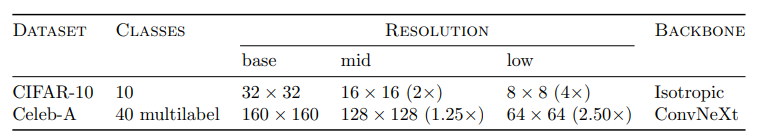

**Zero-shot resolution change**

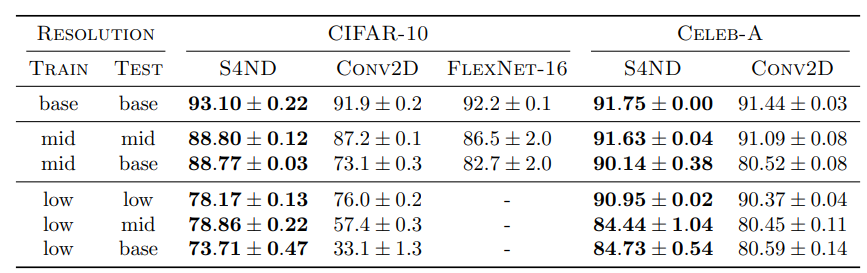

S4ND, Conv2D, FLEXNET(zero-shot resolution sota)를 비교  

Conv2D model의 경우 resolution change에 적응할 수 없어 성능이 좋지 않음, 반면 S4ND는 resolution change에 더 잘 적응함

## **Discussion**



**Summary**

S4ND의 소개, N-dimensional continuous signal model로서 sota performance

**Limitations**  

고차원에서의 training speed가 한계점  

1D image setting S4ND는 ViT와 비슷한 속도지만, 2D setting에서는 ConvNeXt보다 2배 더 느림

**Future works**  

...